In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
def download_top(dates):

    df = pd.DataFrame()


    # Set up Selenium WebDriver
    service = Service(r'C:\Documentos\Github\chromedriver-win32\chromedriver.exe')  # Added .exe extension for Windows
    driver = webdriver.Chrome(service=service)

    for date in dates:

        # URL to scrape
        url = f"https://ratings.fide.com/rankings.phtml?continent=0&country=&rating=standard&gender=&age1=0&age2=0&period={date}-01&period2=1"
        driver.get(url)
        driver.maximize_window()
        time.sleep(10)

        # Extract page source after JavaScript has loaded
        html = driver.page_source

        # Use pandas to read tables
        
        df_ = pd.read_html(html)[0]
        df_.reset_index(drop=True)        
        df_["date"]=date
        df=pd.concat([df,df_])


    # Quit the driver
    driver.quit()
    df["date"]=pd.to_datetime(df["date"])

    return df


In [15]:
"""months = [f"{i}-{j}" for i in list(range(2014,2024)) for j in "01 02 03 04 05 06 07 08 09 10 11 12".split(" ") ]

df=download_top(months)"""

'months = [f"{i}-{j}" for i in list(range(2014,2024)) for j in "01 02 03 04 05 06 07 08 09 10 11 12".split(" ") ]\n\ndf=download_top(months)'

In [16]:
df=pd.read_csv("file_top_100_24years.csv",index_col=0)
#df.to_csv("file_top_100_24years.csv")
df.head()

,#,Name,Title,Fed,Rating,B-Year,date,year,month
0,1,"Carlsen, Magnus",GM,NOR,2872,1990,2014-01-01,2014,1
1,2,"Aronian, Levon",GM,USA,2812,1982,2014-01-01,2014,1
2,3,"Nakamura, Hikaru",GM,USA,2789,1987,2014-01-01,2014,1
3,4,"Kramnik, Vladimir",GM,RUS,2787,1975,2014-01-01,2014,1
4,5,"Topalov, Veselin",GM,BUL,2785,1975,2014-01-01,2014,1


In [17]:
pd.to_datetime(df["date"])


0    2014-01-01
1    2014-01-01
2    2014-01-01
3    2014-01-01
4    2014-01-01
        ...    
95   2023-12-01
96   2023-12-01
97   2023-12-01
98   2023-12-01
99   2023-12-01
Name: date, Length: 11968, dtype: datetime64[ns]

In [18]:
#df['date'].dt.year
#df['month']=df['date'].dt.month

In [19]:
df.shape

(11968, 9)

In [20]:
df.describe()

,#,Rating,B-Year,year,month
count,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000
mean,50.367647,2700.794452,1986.471257,2018.497076,6.500919
std,28.791982,42.902407,8.331982,2.875249,3.452019
min,1.000000,2640.000000,1963.000000,2014.000000,1.000000
25%,25.000000,2667.000000,1983.000000,2016.000000,4.000000
50%,50.000000,2688.000000,1987.000000,2018.000000,7.000000
75%,75.000000,2726.000000,1992.000000,2021.000000,10.000000
max,100.000000,2882.000000,2006.000000,2023.000000,12.000000


In [21]:
crosstab = pd.crosstab(df["Name"],df["#"])
#crosstab = crosstab.assign(Total=crosstab.sum(axis=1))

In [22]:
crosstab

#,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Name,,,,,,,,,,,,,,,,,,,,,
"Abasov, Nijat",0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
"Abdusattorov, Nodirbek",0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
"Adams, Michael",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Adhiban, B.",0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,2,0,3,2,1
"Akobian, Varuzhan",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakubboev, Nodirbek",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Yilmaz, Mustafa",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"Yu, Yangyi",0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
def calculate_position_score(row):
    """
    Calculate the weighted position score for a row based on all columns in the DataFrame.
    
    Parameters:
        row (pd.Series): A row of the DataFrame.
    
    Returns:
        float: The weighted position score.
    """
    total_months = 0
    position_sum = 0
    
    # Use all columns from the row
    for col in row.index:  
        position = int(col)  # Convert column name to integer (assumes numeric column names)
        months = row[col]
        
        total_months += months
        position_sum += position * months
    
    # Calculate average position, weighted by months
    avg_weighted_position = position_sum / total_months
    return round(avg_weighted_position, 2)


In [24]:
crosstab['Weighted Position'] = crosstab.apply(calculate_position_score, axis=1)

In [25]:
crosstab

#,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Weighted Position
Name,,,,,,,,,,,,,,,,,,,,,
"Abasov, Nijat",0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,75.39
"Abdusattorov, Nodirbek",0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,43.00
"Adams, Michael",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32.78
"Adhiban, B.",0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,0,3,2,1,76.49
"Akobian, Varuzhan",0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,89.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakubboev, Nodirbek",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,86.83
"Yilmaz, Mustafa",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,82.00
"Yu, Yangyi",0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,27.57


In [26]:
crosstab[crosstab.index.str.contains("Vlad")]


#,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Weighted Position
Name,,,,,,,,,,,,,,,,,,,,,
"Akopian, Vladimir",0,0,0,0,0,0,0,0,0,0,...,1,2,3,1,2,2,2,1,1,80.33
"Artemiev, Vladislav",0,0,0,0,0,0,0,0,0,1,...,2,0,0,1,0,0,0,0,0,45.41
"Baklan, Vladimir",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,96.50
"Fedoseev, Vladimir",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,55.88
"Kovalev, Vladislav",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,71.11
"Kramnik, Vladimir",0,8,11,13,2,3,8,8,4,2,...,0,0,0,0,0,0,0,0,0,7.37
"Malakhov, Vladimir",0,0,0,0,0,0,0,0,0,0,...,2,2,0,1,7,7,3,1,2,65.84
"Tkachiev, Vladislav",0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,0,2,1,0,0,90.12


In [27]:
sorted = crosstab.sort_values(by="Weighted Position", ascending=True).sort_values(by=list(range(1,20)), ascending=False)


In [28]:
sorted

#,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Weighted Position
Name,,,,,,,,,,,,,,,,,,,,,
"Carlsen, Magnus",120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
"Caruana, Fabiano",0,60,17,12,13,9,6,2,1,0,...,0,0,0,0,0,0,0,0,0,3.38
"Aronian, Levon",0,12,0,10,18,18,16,3,6,10,...,0,0,0,0,0,0,0,0,0,7.83
"Ding, Liren",0,10,44,13,1,0,2,4,5,5,...,0,0,0,0,0,0,0,0,0,8.20
"Kramnik, Vladimir",0,8,11,13,2,3,8,8,4,2,...,0,0,0,0,0,0,0,0,0,7.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Papaioannou, Ioannis",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,99.00
"Gordievsky, Dmitry",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,100.00
"Gupta, Abhijeet",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,100.00


In [29]:
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.width', None)       # Adjust to the full width of the screen

In [30]:
result = pd.concat([sorted.iloc[:20, :20], sorted.iloc[:20, -1]], axis=1)

In [31]:
result

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Weighted Position
Name,,,,,,,,,,,,,,,,,,,,,
"Carlsen, Magnus",120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
"Caruana, Fabiano",0,60,17,12,13,9,6,2,1,0,...,0,0,0,0,0,0,0,0,0,3.38
"Aronian, Levon",0,12,0,10,18,18,16,3,6,10,...,6,1,4,4,1,4,0,0,0,7.83
"Ding, Liren",0,10,44,13,1,0,2,4,5,5,...,3,5,6,2,1,0,0,1,0,8.20
"Kramnik, Vladimir",0,8,11,13,2,3,8,8,4,2,...,0,0,2,6,5,1,1,0,0,7.37
"Firouzja, Alireza",0,6,3,10,3,3,0,0,2,0,...,2,4,0,0,1,1,3,0,0,17.33
"So, Wesley",0,5,2,3,4,12,16,28,13,17,...,4,1,3,1,1,0,1,1,1,8.67
"Nepomniachtchi, Ian",0,4,6,19,13,6,5,4,2,0,...,1,4,0,5,7,3,0,0,1,15.18
"Mamedyarov, Shakhriyar",0,3,11,1,6,5,4,12,7,11,...,9,7,6,3,6,1,7,1,1,10.81


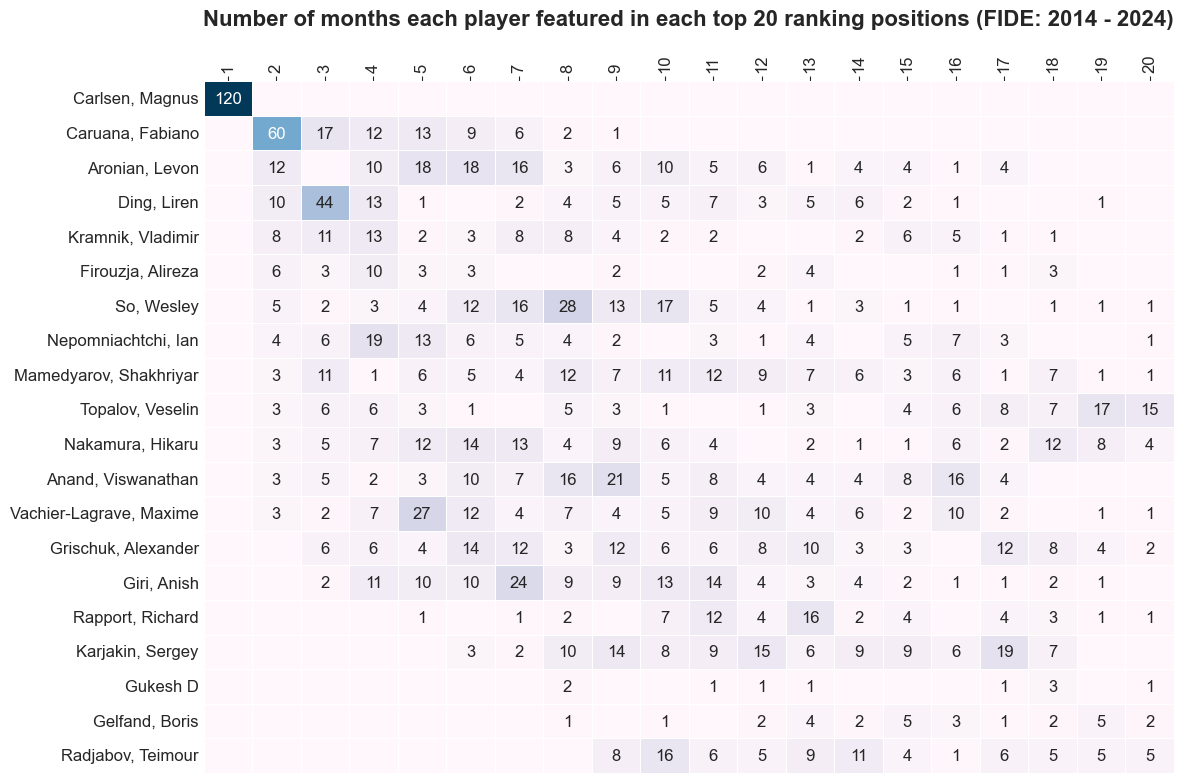

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#result.index = result.apply(lambda row: f"{row.name} ({row['Weighted Position']}) ", axis=1)

# Exclude the last column from the heatmap's color mapping
heatmap_data = result.iloc[:, :-1]  # Exclude the last column

# Apply seaborn style for a clean look
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})



# Create the heatmap with a subtle colormap
plt.figure(figsize=(12, 8))

# Place the title "Names" above the heatmap
#plt.gcf().text(0.09, 0.90, 'Player (Avg. Rank*)', fontsize=12, weight="bold")

ax = sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="PuBu", linewidths=0.5, cbar=False)

# Suppress text annotation for cells with a value of 0
for text in ax.texts:
    if int(text.get_text()) == 0:
        text.set_text('')  # Set empty text for zeros

# Move x-axis labels to the top and rotate them
ax.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
ax.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)


# Move x-axis ticks to the top and y-axis to the left
ax.xaxis.tick_top()
ax.yaxis.tick_left()

ax.tick_params(axis='y', length=0)  # Remove small tick markers on the y-axis


# Remove x and y-axis titles
ax.set_xlabel('')
ax.set_ylabel('')

# Add title
plt.title("Number of months each player featured in each top 20 ranking positions (FIDE: 2014 - 2024)", fontsize=16, weight="bold",pad=20)

# Add small disclaimer text at the bottom
#plt.gcf().text(0.76, 0.003, '*Note: average rank figure is based on data from the top 100 ranking positions, not only top 20.', fontsize=9, ha='center', va='bottom',weight="normal")

# Clean up the layout
plt.tight_layout()

# Show the plot
plt.show()
